#**Proyecto Aplicado: Análisis de Accidentes de Tránsito en Los Angeles utilizando Spark**

---
Presentado por:
- Juan Diego Ocampo (Grupo 6)
- Alejandro García (Grupo 5)

### **Tabla de Contenidos**
---
1. Metodología CRISP-MD (Parte 1): Entendimiento del Negocio <br>
2. Metodología CRISP-MD (Parte 2): Entendimiento de los Datos <br>
3. Visualización de los Datos <br>
4. Conclusiones <br>
5. Video de la Presentación <br>

## **1. Metodología CRISP-MD (Parte 1): Entendimiento del Negocio**
---

### **1.1. Definición de la Propuesta**

Es de interes observar el comportamiento de tráfico en las ciudades, en especial en aquellas donde se observa una gran cantidad de vehiculos. 

En paritucular, la ciudad de Los Angeles es una de las cinco ciudades del mundo con un mayor nivel de flujo vehicular, lo que conlleva a que sea un lugar propicio para una gran cantidad de accidentes automovilisticos, por lo cual es importante estudiar las causas y circunstancias sobre las que suceden estos incidemtes, las variables que influyen, los sectores donde ocurren la mayor cantidad de accidentes, etc. 

Por ello, mediante este estudio, se busca analizar qué variables son las más relevantes tales como las diferencias entre sexo, edad con el fin de poder identificar comportamientos  y patrones que permitan prevenir o inferir comportamientos que los cuales pueden llevar a reducir el número de accidentes.


## **2. Metodología CRISP-MD (Parte 2): Entendimiento de los Datos**
---

#### **2.1. Declaración del Conjunto de Datos**

Para el desarrollo de este proyecto utilizaremos se utilizará el dataset de **Los Angeles Traffic Collision Data** reunido por *Los Angeles Open Data* con el fin de reslizar el procesamiento de datos y visualización sobre los mismos utilizando herramientas de Apache Spark y Python. Este conjunto de datos puede descargarse desde [Kaggle](https://www.kaggle.com/cityofLA/los-angeles-traffic-collision-data/download).

Este conjunto de datos contiene algunas de las siguientes variables:

| **Variable** | **Descripción** |
| --- | --- |
|**RECORD_NUMBER**| Identificador único para cada evento. |
|**DATE_REPORTED**| Fecha en que se reportó el evento.|
|**DATE_OCCURED**| Fecha en que ocurrió el evento.|
|**TIME_OCCURED**| Hora del día a la que ocurrió el evento.|
|**AREA_ID**| Identificador para la zona en que ocurrió el evento. |
|**AREA_NAME**| Nombre de la zona en que ocurrió el evento.|
|**REPORTING_DISTRICT**| Código del distrito que reportó el evento.|
|**ADDRESS**| Dirección en la que ocurrió el evento.|
|**VICTIM_SEX**| Género de cada víctima.||
|**VICTIM_AGE**| Edad de cada víctima.|
|**LOCATION**| Coordenadas geográficas de la ubicación del evento.|
|**ZIP_CODES**| Código postal de la zona en que ocurrió el evento.|
|**PREMISE_DESCRIPTION**| Descripción del recinto en que ocurrió cada evento.|

En este caso, la metodología para abordar el problema del procesamiento y visualización del dataset es la siguiente:

-  Exploracion y Limpieza de Datos
-  Visualización de Datos
-  Analisis Estadistico de los Datos


#### **2.2. Definición de las Tecnologías a Implementar**

Para el desarrollo de este proyecto se utiliza el framework de procesamiento de datos Apache Spark, la cual es el proyecto de código abierto más grande que existe en la actualidad para el análisis y procesamiento de grandes volúmenes de datos.

Apache Spark en sí es un sistema de computación distribuido de basado en la tecnología Hadoop, el cual ha sido diseñado para el análisis y procesamiento de datos tanto en Machine Learning como en Big Data. Esta tecnología consta de dos elementos principales: 

- Spark SQL: es un módulo para el procesamiento de datos estructurados, el cual proporciona una estructura de datos denominada DatafFrame (similar a la estructura con el mismo nombre de la libreria Pandas) y que además es un motor de consulta SQL distribuido.
- Spark Streaming: esta tecnología permite la utilización de aplicaciones interactivas especializadas en el procesamiento en tiempo real de flujos de datos, al tiempo que aprovecha las ventajas de Spark, como la tolerancia a fallos al debido a que se trata de un sistema distribuido.

La utilización de la tecnología Apache Spark tiene unas grandes ventajas, las cuales se mencionarán a continuación. Sin embargo, cabe mencionar que este proyecto no verá reflejadas dichas ventajas dado que está diseñado para ejecutarse desde un ambiente virtual en Google Collaboratory.

- Velocidad: Apache Spark se ha diseñado específicamente para optimizar el rendimiento en el procesamiento de datos a gran escala, aprovechando conceptos como el procesamiento en memoria y otras optimizaciones.
- Facilidad de uso: cuenta con varias APIs sencillas de utilizar para trabajar con grandes conjuntos de datos. Además, tambien cuenta con más de 100 operadores para transformar y manipular los datos semiestructurados.
- Motor unificado: esta herramienta viene integrada con bibliotecas de nivel superior, las cuales incluyen soporte para consultas SQL, transmisión de datos, aprendizaje automático y procesamiento de gráficos. 

### **2.3. Descargar e Importar Librerías**

La siguiente celda contiene el código necesario para descargar los componentes necesarios para la correcta ejecución de este Notebook, tanto Apache Spark como los módulos de Python. Antes de ejecutar la siguiente celda, se debe descargar el archivo TXT con el conjunto de librerías necesarias desde [este link](https://docs.google.com/uc?export=download&id=15fubSlewckLb2bte5RQ41vD6Hl4SsUAI) y se debe importar al explorador de archivos de Google Collaboratory.

In [56]:
# Install Notebook Requirements

try:
  # Install OpenJDK 8
  !apt-get install openjdk-8-jdk-headless -qq > /dev/null
  !wget -q https://www-us.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
  !tar xf spark-3.1.2-bin-hadoop3.2.tgz
  #!wget https://docs.google.com/uc?export=download&id=15fubSlewckLb2bte5RQ41vD6Hl4SsUAI
  !pip install -r requirements.txt
  print('Requirements installed successfully.')  
except Exception() as error:
  print(f'Error: {error}')

Requirements installed successfully.


La siguiente celda contiene el código necesario para importar y configurar los componentes necesarios para la correcta ejecución de este Notebook, tanto Apache Spark como los módulos de Python.

In [57]:
# Import Notebook Requirements

try:
    # Configure Spark Environment
    import os, json, bson
    os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
    os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"
    import findspark
    findspark.init() 
    from pyspark.sql import SparkSession
    spark = SparkSession.builder.master("local[*]").getOrCreate()
    from pyspark.sql.types import DoubleType
    from pyspark.sql import SQLContext
    from pyspark.sql.functions import *
    import pyspark as ps
    # Import Python Libraries
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import plotly.graph_objs as go 
    import plotly.express as px
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    from urllib.request import urlopen
    from IPython.lib.display import YouTubeVideo
    # Configure Python Libraries
    %matplotlib inline
    %config InlineBackend.figure_format = 'retina'
    print('Libraries installed successfully.')    
except Exception as error:
    print(f'Error: {error}')

Libraries installed successfully.


La siguiente celda contiene el código necesario para importar el archivo CSV con el dataset tanto en formato DataFrame de Pandas como DataFrame de Spark.

Antes de ejecutar la siguiente celda, se debe descargar el CSV del conjunto de datos desde [este link](https://docs.google.com/uc?export=download&id=15dv-k5mlxO0cZkvo-jRp-yFpNpy2Httr) y se debe importar al explorador de archivos de Google Collaboratory.

In [58]:
# Read CSV and save as Pandas DataFrame and Spark DataFrame

#!wget https://docs.google.com/uc?export=download&id=15dv-k5mlxO0cZkvo-jRp-yFpNpy2Httr

try: 
    df = pd.read_csv('traffic_LA.csv')
    df_s = spark.read.csv('traffic_LA.csv', inferSchema = True, header = True)
    #df = pd.read_csv(csv_file)
    #df_s = spark.read.csv(csv_file, inferSchema = True, header = True)
    print(f'El dataset "traffic_LA.csv" tiene {df.shape[0]} filas y {df.shape[1]} columnas.')
except Exception as error:
    print(f'Error: {error}')

El dataset "traffic_LA.csv" tiene 502858 filas y 24 columnas.


###**2.4. Exploración y Limpieza de los Datos**

Las siguientes celdas contienen el código utilizado para la exploración de los datos, el cual será utilizado para elaborar los criterios para la limpieza de los datos.

In [59]:
# Visualise DataType for each column on both DataFrames.

print(f'Tipos de dato (DataFrame de Pandas y Spark): \n{df.dtypes} \n')
print(df_s.printSchema())

Tipos de dato (DataFrame de Pandas y Spark): 
DR Number                              int64
Date Reported                         object
Date Occurred                         object
Time Occurred                          int64
Area ID                                int64
Area Name                             object
Reporting District                     int64
Crime Code                             int64
Crime Code Description                object
MO Codes                              object
Victim Age                           float64
Victim Sex                            object
Victim Descent                        object
Premise Code                         float64
Premise Description                   object
Address                               object
Cross Street                          object
Location                              object
Zip Codes                            float64
Census Tracts                        float64
Precinct Boundaries                  float64
LA Specif

In [60]:
# Rename Columns on both DataFrames

df.columns = ['RECORD_NUMBER', 'DATE_REPORTED', 'DATE_OCCURED', 'TIME_OCCURED', 'AREA_ID', 'AREA_NAME', 'REPORTING_DISTRICT', 'CRIME_CODE', 
           'CRIME_CODE_DESCRIPTION', 'MO_CODES', 'VICTIM_AGE', 'VICTIM_SEX', 'VICTIM_DESCENT', 'PREMISE_CODE', 'PREMISE_DESCRIPTION',
           'ADDRESS', 'CROSS_STREET', 'LOCATION', 'ZIP_CODES', 'CENSUS_TRACTS', 'PRECINT_BOUNDARIES', 'LA_SPECIFIC_PLANS', 'COUNCIL_DISTRICTS',
           'NEIGHBOURHOOD_COUNCILS']

df_s = df_s.toDF('RECORD_NUMBER', 'DATE_REPORTED', 'DATE_OCCURED', 'TIME_OCCURED', 'AREA_ID', 'AREA_NAME', 'REPORTING_DISTRICT', 'CRIME_CODE', 
           'CRIME_CODE_DESCRIPTION', 'MO_CODES', 'VICTIM_AGE', 'VICTIM_SEX', 'VICTIM_DESCENT', 'PREMISE_CODE', 'PREMISE_DESCRIPTION',
           'ADDRESS', 'CROSS_STREET', 'LOCATION', 'ZIP_CODES', 'CENSUS_TRACTS', 'PRECINT_BOUNDARIES', 'LA_SPECIFIC_PLANS', 'COUNCIL_DISTRICTS',
           'NEIGHBOURHOOD_COUNCILS')

In [61]:
# Visualise Pandas DataFrame

df.head(10)

,RECORD_NUMBER,DATE_REPORTED,DATE_OCCURED,TIME_OCCURED,AREA_ID,AREA_NAME,REPORTING_DISTRICT,CRIME_CODE,CRIME_CODE_DESCRIPTION,MO_CODES,VICTIM_AGE,VICTIM_SEX,VICTIM_DESCENT,PREMISE_CODE,PREMISE_DESCRIPTION,ADDRESS,CROSS_STREET,LOCATION,ZIP_CODES,CENSUS_TRACTS,PRECINT_BOUNDARIES,LA_SPECIFIC_PLANS,COUNCIL_DISTRICTS,NEIGHBOURHOOD_COUNCILS
0,191323054,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,130,13,Newton,1385,997,TRAFFIC COLLISION,NaN,NaN,F,H,101.0,STREET,SAN PEDRO ST,SLAUSON AV,"{'longitude': '-118.2696', 'human_address': '{...",22352.0,786.0,858.0,7.0,13.0,46.0
1,192020666,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,15,20,Olympic,2054,997,TRAFFIC COLLISION,NaN,40.0,M,W,101.0,STREET,OLYMPIC BL,KINGSLEY AV,"{'longitude': '-118.3031', 'human_address': '{...",22723.0,617.0,646.0,NaN,12.0,89.0
2,191616992,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,230,16,Foothill,1669,997,TRAFFIC COLLISION,NaN,18.0,M,W,101.0,STREET,TUJUNGA CANYON BL,LA TUNA CANYON RD,"{'longitude': '-118.2704', 'human_address': '{...",3222.0,5.0,227.0,NaN,1.0,7.0
3,191824082,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,730,18,Southeast,1802,997,TRAFFIC COLLISION,0605,23.0,M,H,101.0,STREET,88TH ST,MAIN ST,"{'longitude': '-118.2739', 'human_address': '{...",22352.0,800.0,358.0,7.0,14.0,45.0
4,191616980,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,720,16,Foothill,1689,997,TRAFFIC COLLISION,NaN,NaN,M,H,101.0,STREET,CROCKETT,SUNLAND,"{'longitude': '-118.3703', 'human_address': '{...",19335.0,166.0,272.0,NaN,3.0,21.0
5,191824078,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,1050,18,Southeast,1836,997,TRAFFIC COLLISION,4025 3037 3004 3026 3101,54.0,F,B,101.0,STREET,COMPTON AV,109TH ST,"{'longitude': '-118.2463', 'human_address': '{...",24354.0,817.0,1187.0,7.0,15.0,40.0
6,190417458,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,130,4,Hollenbeck,411,997,TRAFFIC COLLISION,0605,33.0,F,B,101.0,STREET,BROADWAY,PASADENA AV,"{'longitude': '-118.2242', 'human_address': '{...",23448.0,492.0,943.0,1.0,11.0,1.0
7,191616985,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,700,16,Foothill,1687,997,TRAFFIC COLLISION,NaN,35.0,M,H,101.0,STREET,TUJUNGA AV,PENROSE ST,"{'longitude': '-118.3795', 'human_address': '{...",19335.0,162.0,272.0,NaN,3.0,21.0
8,191718751,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,1230,17,Devonshire,1775,997,TRAFFIC COLLISION,NaN,51.0,M,O,101.0,STREET,WISH,VINCENNES,"{'longitude': '-118.5084', 'human_address': '{...",18514.0,104.0,1422.0,NaN,2.0,87.0
9,191718743,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,10,17,Devonshire,1737,997,TRAFFIC COLLISION,NaN,23.0,F,H,101.0,STREET,HAYVENHURST,SAN FERNANDO MISSION,"{'longitude': '-118.4934', 'human_address': '{...",19329.0,78.0,382.0,NaN,2.0,79.0


In [62]:
# Visualise Spark DataFrame

print(df_s.show(10))

+-------------+-------------------+-------------------+------------+-------+----------+------------------+----------+----------------------+--------------------+----------+----------+--------------+------------+-------------------+--------------------+--------------------+--------------------+---------------+----------------+------------------+--------------------+-----------------+----------------------+
|RECORD_NUMBER|      DATE_REPORTED|       DATE_OCCURED|TIME_OCCURED|AREA_ID| AREA_NAME|REPORTING_DISTRICT|CRIME_CODE|CRIME_CODE_DESCRIPTION|            MO_CODES|VICTIM_AGE|VICTIM_SEX|VICTIM_DESCENT|PREMISE_CODE|PREMISE_DESCRIPTION|             ADDRESS|        CROSS_STREET|            LOCATION|      ZIP_CODES|   CENSUS_TRACTS|PRECINT_BOUNDARIES|   LA_SPECIFIC_PLANS|COUNCIL_DISTRICTS|NEIGHBOURHOOD_COUNCILS|
+-------------+-------------------+-------------------+------------+-------+----------+------------------+----------+----------------------+--------------------+----------+----------

#### **2.4.1. Seleccion y Eliminacion de Columnas**

En esta sección se encuentra el código empleado para la limpieza de los datos. Aquí, se eliminarán columnas cuyo contenido no aporte informacion relevante al registro de los datos, tales como códigos de identificación, numeración, etc.

#### `RECORD_NUMBER`

Esta columna se eliminará puesto que en ella únicamente se almacena el código de identificación único que se tomó para cada evento, por ende no muestra información relevante.

In [63]:
# Drop RECORD_NUMBER Column

df = df.drop(columns = ['RECORD_NUMBER'])
df_s = df_s.drop(df_s.RECORD_NUMBER)

#### `DATE_REPORTED`

La fecha de reporte de cada evento no es de tanto interés en este caso, puesto que se desea conocer patrones que permitan establecer por ejemplo el mes en el cual se presenta el mayor número de accidentes, razón por la cual es más relevante la fecha en que ocurre el accidente en sí, ya que al conservar ambas columnas se observarían desfases entre tiempos de accidente y reporte.

In [64]:
# Drop DATE_REPORTED Column

df = df.drop(columns = ['DATE_REPORTED'])
df_s=df_s.drop(df_s.DATE_REPORTED)

#### `AREA_ID`

Esta columna se puede eliminar ya que el nombre del área en que ocurre cada evento se tiene en otra columna, y por ende conservar ambas sería redundante. 

In [65]:
# Drop AREA_ID Column

df = df.drop(columns = ['AREA_ID'])
df_s = df_s.drop(df_s.AREA_ID)

#### `MO_CODES`
Esta columna contiene códigos o identificadores relacionados al área en que ocurre el evento, por lo que al igual que en el caso de la columna `AREA ID`su información es reduntante y no aporta signficativamente al estudio. 

In [66]:
# Drop MO_CODES Column

df = df.drop(columns = ['MO_CODES'])
df_s = df_s.drop(df_s.MO_CODES)

#### `CRIME_CODE`
Esta columna se relaciona directamente con el tipo de crimen, y como el dataset contiene únicamente eventos relacionados con accidentes de tránsito este valor será el mismo para todos los registros, por lo cual no aporta información alguna y puede eliminarse.

In [67]:
# Drop CRIME_CODE Column

df = df.drop(columns = ['CRIME_CODE'])
df_s = df_s.drop(df_s.CRIME_CODE)

#### `PREMISE_CODE`

Esta columna contiene la descripción de la premisa, por lo cual no aporta información relevante.


In [68]:
# Drop PREMISE_CODE Column

df = df.drop(columns = ['PREMISE_CODE'])
df_s = df_s.drop(df_s.PREMISE_CODE)

#### `REPORTING_DISTRICT`

Esta columna evalúa el número del reporte del accidente, lo cual en sí da como resultado el número total, pero no representa un número de interes, ya que este cambia reporte a reporte.

In [69]:
# Drop REPORTING_DISTRICT Column

df = df.drop(columns = ['REPORTING_DISTRICT'])
df_s = df_s.drop(df_s.REPORTING_DISTRICT)

#### `LOCATION`

Este valor no aporta información relevante ya que contiene las coordenadas geográficas de la dirección en que se presentó el accidente, lo cual se escapa del alcance de este estudio. Por ello, se procederá a eliminar esta columna.

In [70]:
# Drop LOCATION Column

df = df.drop(columns = ['LOCATION'])
df_s = df_s.drop(df_s.LOCATION)

#### `ZIP CODE, CENSUS TRACT, PRECIENT BOUNDARIES, LA SPECIFIC PLANS, COUNCIL DISTRICTS, NEITGBOURHOOD COUNCILS, CRIME_CODE_DECRIPTCION`

Estas columnas contienen información sobre códigos en general, tales como el código postal, lo cual resta de importancia en nuestro estudio.

In [71]:
# Drop ZIP_CODES, NEIGHBOURHOOD_COUNCILS, CENSUS_TRACTS, PRECINT_BOUNDARIES, LA_SPECIFIC_PLANS, COUNCIL_DISTRICTS Columns

df = df.drop(columns = ['ZIP_CODES','NEIGHBOURHOOD_COUNCILS','CENSUS_TRACTS','PRECINT_BOUNDARIES','LA_SPECIFIC_PLANS','COUNCIL_DISTRICTS','CRIME_CODE_DESCRIPTION','TIME_OCCURED'])

df_s = df_s.drop(df_s.ZIP_CODES)
df_s = df_s.drop(df_s.NEIGHBOURHOOD_COUNCILS)
df_s = df_s.drop(df_s.CENSUS_TRACTS)
df_s = df_s.drop(df_s.PRECINT_BOUNDARIES)
df_s = df_s.drop(df_s.LA_SPECIFIC_PLANS)
df_s = df_s.drop(df_s.COUNCIL_DISTRICTS)
df_s = df_s.drop(df_s.CRIME_CODE_DESCRIPTION)
df_s = df_s.drop(df_s.TIME_OCCURED)

In [72]:
# Visualise Pandas DataFrame after Deleting Unnecessary Columns

df.head(10)

,DATE_OCCURED,AREA_NAME,VICTIM_AGE,VICTIM_SEX,VICTIM_DESCENT,PREMISE_DESCRIPTION,ADDRESS,CROSS_STREET
0,2019-11-30T00:00:00.000,Newton,NaN,F,H,STREET,SAN PEDRO ST,SLAUSON AV
1,2019-11-30T00:00:00.000,Olympic,40.0,M,W,STREET,OLYMPIC BL,KINGSLEY AV
2,2019-11-30T00:00:00.000,Foothill,18.0,M,W,STREET,TUJUNGA CANYON BL,LA TUNA CANYON RD
3,2019-11-30T00:00:00.000,Southeast,23.0,M,H,STREET,88TH ST,MAIN ST
4,2019-11-30T00:00:00.000,Foothill,NaN,M,H,STREET,CROCKETT,SUNLAND
5,2019-11-30T00:00:00.000,Southeast,54.0,F,B,STREET,COMPTON AV,109TH ST
6,2019-11-30T00:00:00.000,Hollenbeck,33.0,F,B,STREET,BROADWAY,PASADENA AV
7,2019-11-30T00:00:00.000,Foothill,35.0,M,H,STREET,TUJUNGA AV,PENROSE ST
8,2019-11-30T00:00:00.000,Devonshire,51.0,M,O,STREET,WISH,VINCENNES
9,2019-11-30T00:00:00.000,Devonshire,23.0,F,H,STREET,HAYVENHURST,SAN FERNANDO MISSION


In [73]:
# Visualise Spark DataFrame after Deleting Unnecessary Columns

print(df_s.show(10))

+-------------------+----------+----------+----------+--------------+-------------------+--------------------+--------------------+
|       DATE_OCCURED| AREA_NAME|VICTIM_AGE|VICTIM_SEX|VICTIM_DESCENT|PREMISE_DESCRIPTION|             ADDRESS|        CROSS_STREET|
+-------------------+----------+----------+----------+--------------+-------------------+--------------------+--------------------+
|2019-11-30 00:00:00|    Newton|      null|         F|             H|             STREET|SAN PEDRO        ...|SLAUSON          ...|
|2019-11-30 00:00:00|   Olympic|        40|         M|             W|             STREET|OLYMPIC          ...|KINGSLEY         ...|
|2019-11-30 00:00:00|  Foothill|        18|         M|             W|             STREET|TUJUNGA CANYON   ...|LA TUNA CANYON   ...|
|2019-11-30 00:00:00| Southeast|        23|         M|             H|             STREET|88TH             ...|MAIN             ...|
|2019-11-30 00:00:00|  Foothill|      null|         M|             H|       

#### **2.4.2. Eliminación o Reemplazo de Datos Faltantes**

En las siguientes celdas se encuentra el código mediante el cual se buscarán los datos más relevantes del estudio para así poder disminuir el peso del DataFrame y tener mayor facilidad para asociaciones y busqueda de datos de interés.

In [74]:
# Visualise Ammount of Missing Values

print(df.isnull().sum())

DATE_OCCURED               0
AREA_NAME                  0
VICTIM_AGE             78714
VICTIM_SEX              7615
VICTIM_DESCENT          8407
PREMISE_DESCRIPTION       26
ADDRESS                    0
CROSS_STREET           22962
dtype: int64


#### `VICTIM_AGE`

Los valores faltantes se reemplazarán por la mediana de la muestra de edades del DataFrame. 

In [75]:
# Fill Missing Values from VICTIM_AGE Column with the Median

victim_age_median = np.median(df['VICTIM_AGE'])

df['VICTIM_AGE'].fillna(np.mean(victim_age_median), inplace = True)
df_s = df_s.na.fill(value = victim_age_median, subset = ['VICTIM_AGE'])

In [76]:
df.isnull().sum()

DATE_OCCURED               0
AREA_NAME                  0
VICTIM_AGE             78714
VICTIM_SEX              7615
VICTIM_DESCENT          8407
PREMISE_DESCRIPTION       26
ADDRESS                    0
CROSS_STREET           22962
dtype: int64

#### `VICTIM_SEX`

En primer lugar, se estimará el porcentaje de los datos faltantes en total para la columna `VICTIM SEX`.

In [77]:
porcentajes_datos = (df.isnull().sum()[3]/df.shape[0]) * 100
print(f'Porcentaje de Datos Faltantes (VICTIM_SEX): {porcentajes_datos:.3f}%')

Porcentaje de Datos Faltantes (VICTIM_SEX): 1.514%


Como se puede observar, los datos ocsilan alrededor del 1.5 % por lo cual se procedera a eliminarlos.

In [78]:
df_s = df_s.na.drop(subset = ["VICTIM_SEX"])

#### `CROSS_STREET`

Se procede a evaluar el número de registros faltantes en la columna `CROSS_STREET` en porcentaje para evaluar su relevancia y si se puede proceder a eliminarlos.

In [79]:
porcentajes_datos1 = (df.isnull().sum()[-1]/df.shape[0]) * 100
print(f'Porcentaje de Datos Faltantes (CROSS_STREET): {porcentajes_datos1:.3f}%')

Porcentaje de Datos Faltantes (CROSS_STREET): 4.566%


Debido a que el porcentaje de datos faltantes en esta columna es bajo (menor al 5%), se procederá a eliminar las filas con datos faltantes en esta columna.

In [80]:
df_s = df_s.na.drop(subset = ["CROSS_STREET"])

#### **2.4.3. Separación de la Columna `DATE_OCCURED`**

In [81]:
df_s = df_s.withColumn('year', split(df_s['DATE_OCCURED'], '-').getItem(0)).withColumn('month', split(df_s['DATE_OCCURED'], '-').getItem(1))
df_s = df_s.drop(df_s.DATE_OCCURED)

#### **2.4.4. Creacion de Categorias por Edad**

In [82]:
import pyspark.sql.functions as F
from pyspark.sql.types import *

def edad(a):
  if   0 <= a < 12: 
      return 'Niño'
  elif 12 < a <= 18:
      return 'Adolecente'
  elif 18 < a <= 30:
      return 'Joven'
  elif 30 < a <= 60:
      return 'Adulto'
  elif 60 < a:
      return 'Anciano'

# Convert to a UDF Function by passing in the function and return type of function
edadfun = F.udf(edad, StringType())
df_s = df_s.withColumn("AGE", edadfun("VICTIM_AGE"))

#### **2.4.5. DataFrame luego del Procesamiento**

In [83]:
df_s.show(10)

+----------+----------+----------+--------------+-------------------+--------------------+--------------------+----+-----+----------+
| AREA_NAME|VICTIM_AGE|VICTIM_SEX|VICTIM_DESCENT|PREMISE_DESCRIPTION|             ADDRESS|        CROSS_STREET|year|month|       AGE|
+----------+----------+----------+--------------+-------------------+--------------------+--------------------+----+-----+----------+
|    Newton|         0|         F|             H|             STREET|SAN PEDRO        ...|SLAUSON          ...|2019|   11|      Niño|
|   Olympic|        40|         M|             W|             STREET|OLYMPIC          ...|KINGSLEY         ...|2019|   11|    Adulto|
|  Foothill|        18|         M|             W|             STREET|TUJUNGA CANYON   ...|LA TUNA CANYON   ...|2019|   11|Adolecente|
| Southeast|        23|         M|             H|             STREET|88TH             ...|MAIN             ...|2019|   11|     Joven|
|  Foothill|         0|         M|             H|             

In [84]:
type(df_s)

pyspark.sql.dataframe.DataFrame

## **3. Visualización de los Datos**
---

Se realizó un analisis estadístico general de los datos para encontrar patrones que nos permitan designar comportamientos caracteristicos en los accidentes.

Se puede observar claramente que el sexo predominante en accidentes es el genero masculino, donde en los diferentes años presenta casi el doble de accidentes que el genero femenino y el resto de generos. Indicando que en movilidad, los hombres tienden a ser mas riegosos que los demás generos.

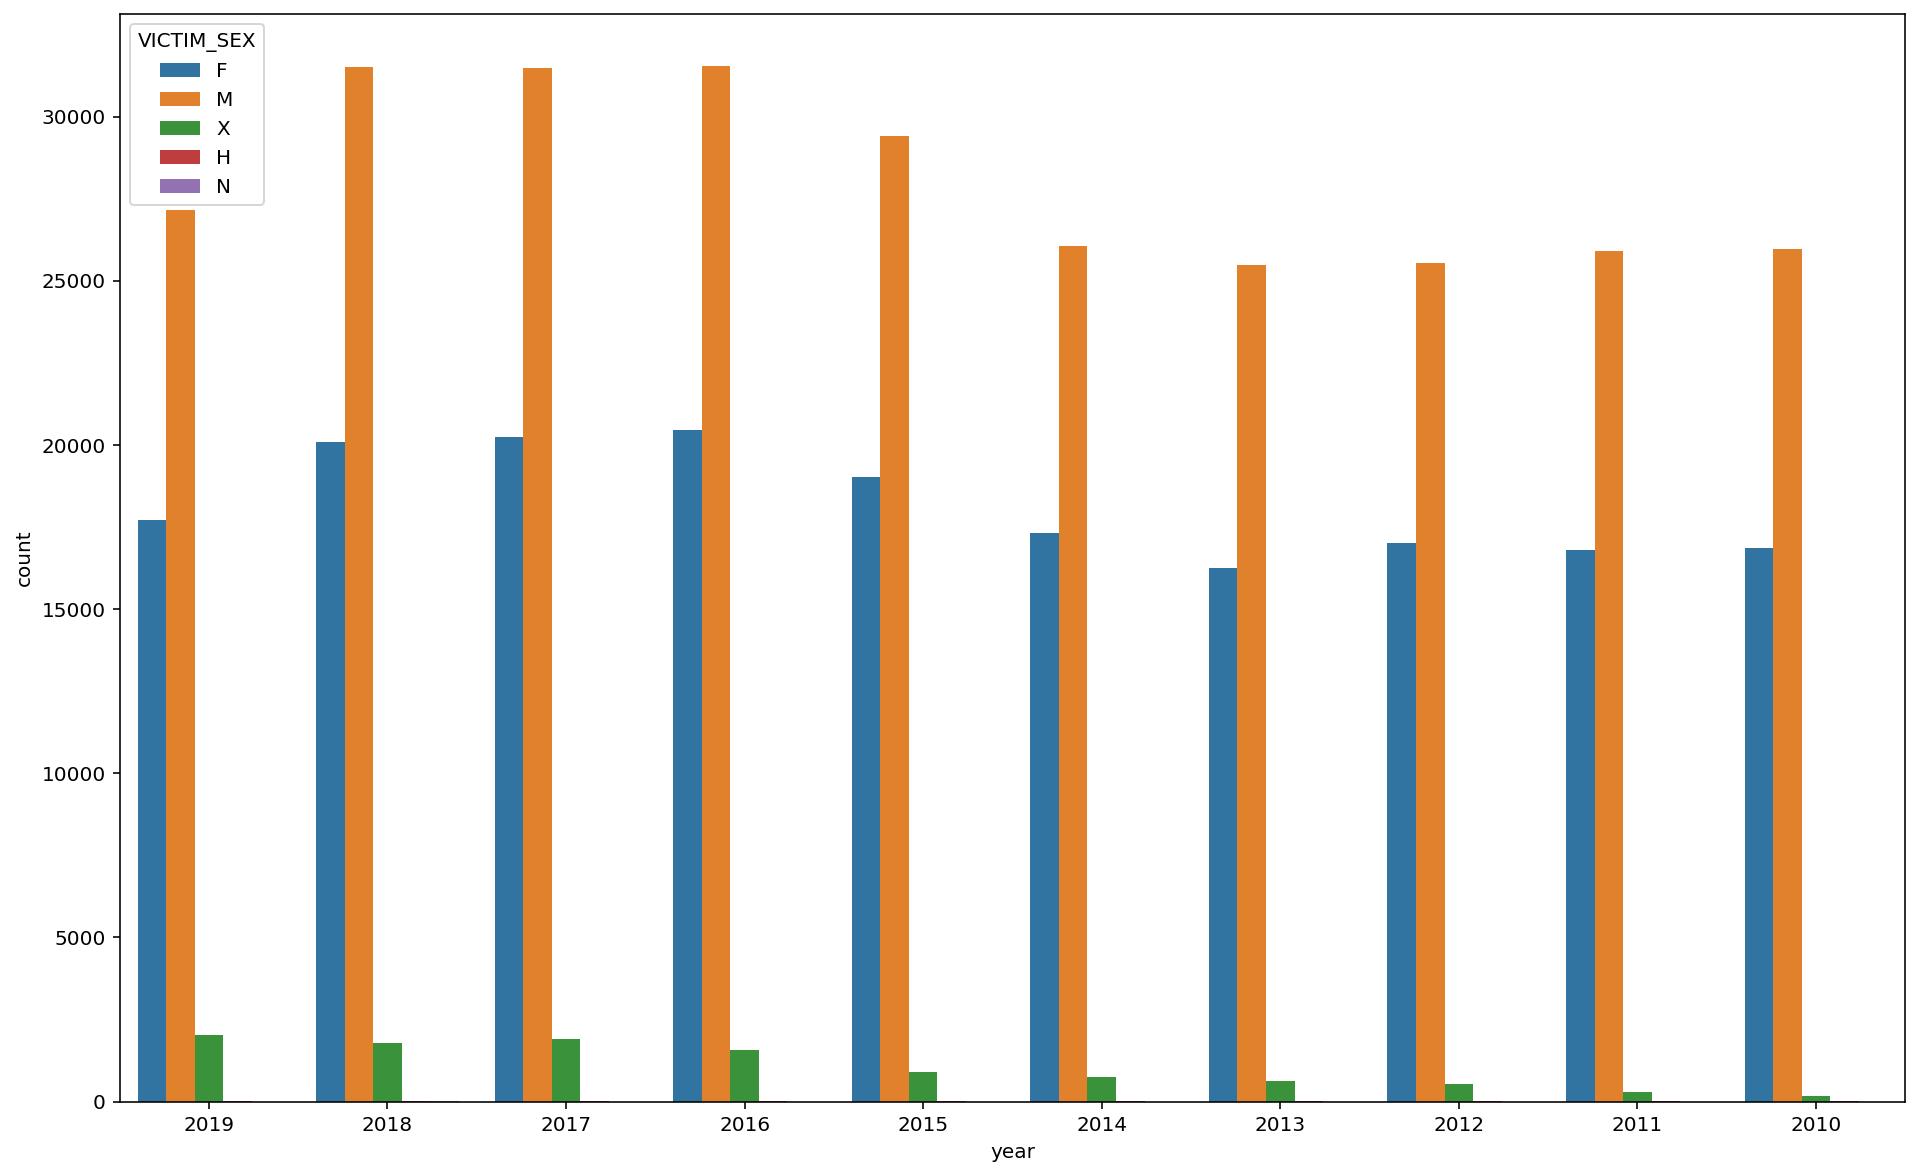

In [85]:
fig1, ax1 = plt.subplots(figsize= (16, 10))
ax1 = sns.countplot(x = "year", hue =  "VICTIM_SEX", data = df_s.toPandas())

#### **3.1. Total de Accidentes por Año**

La gráfica que se presenta a continuación muestra la totalidad de accidentes durante los 10 años que se encuentran presentes en el DataFrame `df_s`.

In [86]:
# Bar Plot: Total Accidents per Year

yearly_accidents = (df_s.groupBy("year")).count().toPandas()
yearly_accidents_xticks = np.linspace(start = 2010, stop = 2019, num = 10)
yearly_accidents.year = yearly_accidents_xticks

yearly_accidents_fig = px.bar(yearly_accidents, 
                        x = "year", 
                        y = "count", 
                        color = 'year',
                        labels = {'year' : 'Year', 'count' : 'Total of Accidents'}, 
                        width = 1600 * 0.75,
                        height = 1000 * 0.75)
yearly_accidents_fig.update_layout(title_text = 'Total Accidents per Year', title_x = 0.5)
yearly_accidents_fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = yearly_accidents_xticks, ticktext = yearly_accidents_xticks))
yearly_accidents_fig.show()

#### **3.2. Total de Accidentes por Mes**

La gráfica que se presenta a continuación muestra la  totalidad de accidentes durante los 10 años que se encuentran presentes en el DataFrame `df_s` en función del mes.

In [87]:
# Bar Plot: Total Accidents per Montn

monthly_accidents = (df_s.groupBy("month")).count().toPandas()
monthly_accidents.month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_accidents_fig = px.bar(monthly_accidents, 
                        x = "month", 
                        y = "count",
                        color = 'month',  
                        labels = {'month':'Month', 'count':'Total of Accidents'}, 
                        width = 1600 * 0.75,
                        height = 1000 * 0.75)
monthly_accidents_fig.update_layout(title_text = 'Total Accidents per Month', title_x = 0.5)
monthly_accidents_fig.show()

#### **3.3. Total de Accidentes por Mes (2)**

La gráfica que se presenta a continuación muestra la totalidad de accidentes ocurridos durante los cinco años con mayor accidentalidad (2015-2019) en función del mes.

In [88]:
# Bar Plot: Monthly Accidents in the years with the most ammount of accidents

monthly_accidents_2015 = df_s[df_s.year == 2015].groupBy("month").count().toPandas()
monthly_accidents_2016 = df_s[df_s.year == 2016].groupBy("month").count().toPandas()
monthly_accidents_2017 = df_s[df_s.year == 2017].groupBy("month").count().toPandas()
monthly_accidents_2018 = df_s[df_s.year == 2018].groupBy("month").count().toPandas()
monthly_accidents_2019 = df_s[df_s.year == 2019].groupBy("month").count().toPandas()

months_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_accidents_top5 = go.Figure(data = [
    go.Bar(name = '2015', x = months_names, y = monthly_accidents_2015['count'], marker_color ='#00D2BE'),
    go.Bar(name = '2016', x = months_names, y = monthly_accidents_2016['count'], marker_color ='#DC0000'),
    go.Bar(name = '2017', x = months_names, y = monthly_accidents_2017['count'], marker_color ='#0600EF'),
    go.Bar(name = '2018', x = months_names, y = monthly_accidents_2018['count'], marker_color ='#FF8700'),
    go.Bar(name = '2019', x = months_names, y = monthly_accidents_2019['count'], marker_color ='#006F62')
    ])
monthly_accidents_top5.update_layout(barmode = 'group', width = 1600 * 0.75, height = 1000 * 0.75)
monthly_accidents_top5.update_layout(title_text = "Monthly Accident Count from 2015 to 2019", title_x = 0.5)
monthly_accidents_top5.show()

#### **3.4. Total de Accidentes por Área**

La gráfica que se presenta a continuación muestra la totalidad de accidentes ocurridos durante los tres años con mayor accidentalidad (2016-2018) en función del área en que ocurrió el incidente.

In [89]:
# Bar Plot: Overall accidents in the top 3 years with the most ammount of accidents ordered by Area Name

accidents_by_area_2016 = df_s[df_s.year == 2016].groupBy("AREA_NAME").count().toPandas()
accidents_by_area_2017 = df_s[df_s.year == 2017].groupBy("AREA_NAME").count().toPandas()
accidents_by_area_2018 = df_s[df_s.year == 2018].groupBy("AREA_NAME").count().toPandas()

accidents_by_area_fig = go.Figure(data = [
    go.Bar(name = '2016', x = accidents_by_area_2016["AREA_NAME"], y = accidents_by_area_2016['count'], marker_color ='#00D2BE'),
    go.Bar(name = '2017', x = accidents_by_area_2017["AREA_NAME"], y = accidents_by_area_2017['count'], marker_color ='#DC0000'),
    go.Bar(name = '2018', x = accidents_by_area_2018["AREA_NAME"], y = accidents_by_area_2018['count'], marker_color ='#0600EF')
    ])
accidents_by_area_fig.update_layout(barmode = 'group', width = 1600 * 0.75, height = 1000 * 0.75)
accidents_by_area_fig.update_layout(title_text = "Accident Count from 2016 to 2018 by Area", title_x = 0.5)
accidents_by_area_fig.show()

Estudiando en específico la dirección en que se presentaron los eventos, se puede ver que existe una gran cantidad de accidentes en las avenidas Sherman, Western, Ventura, Sepulveda, Victory, Figueroa, Vermont y Vanwomen, Roscoe y Van Nuys, donde los accidentes superan la cifra de 1000 en cada caso.

In [90]:
# Data Inspection: Avenues with the most number of accidents

from pyspark.sql.functions import desc
df_s.groupBy('ADDRESS').count().orderBy(desc('count')).show()

+--------------------+-----+
|             ADDRESS|count|
+--------------------+-----+
|WESTERN          ...| 6499|
|VENTURA          ...| 6089|
|SHERMAN          ...| 5957|
|SEPULVEDA        ...| 5586|
|VERMONT          ...| 5438|
|VICTORY          ...| 5280|
|SUNSET           ...| 5052|
|FIGUEROA         ...| 4843|
|ROSCOE           ...| 4532|
|OLYMPIC          ...| 4295|
|VAN NUYS         ...| 4278|
|VANOWEN          ...| 4257|
|PICO             ...| 3771|
|WILSHIRE         ...| 3495|
|LAUREL CANYON    ...| 3393|
|NORMANDIE        ...| 3315|
|VENICE           ...| 3314|
|            BROADWAY| 3236|
|3RD              ...| 3067|
|LA BREA          ...| 2925|
+--------------------+-----+
only showing top 20 rows



Analizando los datos de los diferentes años del dataset, se pueden estimar las calles o direcciones con un mayor grado de accidentalidad en Los Angeles.

In [91]:
# Data Inspection: Avenues with the most number of accidents by year

df_2017 = df_s.filter((df_s["year"] == '2017'))
df_2018 = df_s.filter((df_s["year"] == '2018'))
df_2019 = df_s.filter((df_s["year"] == '2019'))

In [92]:
df_2017.groupBy('ADDRESS').count().orderBy(desc('count')).show(5)

+--------------------+-----+
|             ADDRESS|count|
+--------------------+-----+
|WESTERN          ...|  741|
|SHERMAN          ...|  667|
|VENTURA          ...|  660|
|VERMONT          ...|  659|
|FIGUEROA         ...|  644|
+--------------------+-----+
only showing top 5 rows



In [93]:
df_2018.groupBy('ADDRESS').count().orderBy(desc('count')).show(5)

+--------------------+-----+
|             ADDRESS|count|
+--------------------+-----+
|WESTERN          ...|  762|
|SHERMAN          ...|  751|
|VENTURA          ...|  728|
|VICTORY          ...|  694|
|SEPULVEDA        ...|  653|
+--------------------+-----+
only showing top 5 rows



In [94]:
df_2019.groupBy('ADDRESS').count().orderBy(desc('count')).show(5)

+--------------------+-----+
|             ADDRESS|count|
+--------------------+-----+
|SHERMAN          ...|  651|
|VENTURA          ...|  619|
|WESTERN          ...|  609|
|SEPULVEDA        ...|  607|
|VICTORY          ...|  549|
+--------------------+-----+
only showing top 5 rows



#### **3.5. Total de Accidentes por Género**

La gráfica que se presenta a continuación muestra la totalidad de accidentes ocurridos en función del género.

In [95]:
# Pie Chart: Accidents by Gender

accidents_by_gender = (df_s.groupBy("VICTIM_SEX")).count().toPandas()
accidents_by_gender.VICTIM_SEX = ['Female', 'Male', 'Neutral', 'Non-Binary', 'Hybrid']

premsise_desc_fig = go.Figure(data = [go.Pie(labels = accidents_by_gender['VICTIM_SEX'], values = accidents_by_gender['count'], pull=[0.05, 0.05, 0.05, 0])])
premsise_desc_fig.update_layout(title_text = "Accident Count by Gender", title_x = 0.5, width = 1600 * 0.75, height = 1000 * 0.75)
premsise_desc_fig.show()

Realizando un análisis más detallado del tipo de accidente que sufrieron los géneros femenino y masculino se observa que:

In [96]:
# Data Inspection: Accident Location (Generic) by Gender

df_f = df_s.filter((df_s["VICTIM_SEX"] == 'F'))
df_m = df_s.filter((df_s["VICTIM_SEX"] == 'M'))

In [97]:
df_f.groupBy('PREMISE_DESCRIPTION').count().orderBy(desc('count')).show(5)

+-------------------+------+
|PREMISE_DESCRIPTION| count|
+-------------------+------+
|             STREET|174358|
|        PARKING LOT|  5873|
|           SIDEWALK|   526|
|           DRIVEWAY|   260|
|              ALLEY|   243|
+-------------------+------+
only showing top 5 rows



In [98]:
df_m.groupBy('PREMISE_DESCRIPTION').count().orderBy(desc('count')).show(5)

+-------------------+------+
|PREMISE_DESCRIPTION| count|
+-------------------+------+
|             STREET|268092|
|        PARKING LOT|  7982|
|           SIDEWALK|  1744|
|              ALLEY|   515|
|           DRIVEWAY|   438|
+-------------------+------+
only showing top 5 rows



#### **3.6. Total de Accidentes por Edad**

La gráfica que se presenta a continuación muestra la totalidad de accidentes ocurridos en función de la edad exacta.

In [99]:
# Bar Plot: Accident Count by Age

accidents_by_age = df_s.groupBy("VICTIM_AGE").count().toPandas()

accidents_by_age_fig = px.bar(accidents_by_age, 
                        x = "VICTIM_AGE", 
                        y = "count", 
                        color = 'VICTIM_AGE',
                        labels = {'VICTIM_AGE' : 'Age', 'count' : 'Total of Accidents'}, 
                        width = 1600 * 0.75,
                        height = 1000 * 0.75)
accidents_by_age_fig.update_layout(title_text = 'Total Accidents by Age', title_x = 0.5)
accidents_by_age_fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = yearly_accidents_xticks, ticktext = yearly_accidents_xticks))
accidents_by_age_fig.show()

La gráfica que se presenta a continuación muestra la totalidad de accidentes ocurridos en función de la edad exacta para el rango de edades entre 10 y 90 años.

In [100]:
# Bar Plot: Accident Count by Age (10-90 years old)

accidents_by_age_fig2 = accidents_by_age_fig
accidents_by_age_fig2.update_layout(title_text = 'Total Accidents by Age (10 to 90 years old)', title_x = 0.5)
accidents_by_age_fig2.update_xaxes(range=[10, 90])
accidents_by_age_fig2.update_yaxes(range=[0, 15e3])
accidents_by_age_fig2.show()

#### **3.7. Total de Accidentes por Grupo de Edad (2015-2019)**

La gráfica que se presenta a continuación muestra la totalidad de accidentes ocurridos en función del grupo de edad para los cinco años con mayor accidentalidad (2015-2019):

In [101]:
# Bar Plot: Yearly Accidents in the years with the most ammount of accidents by Age_Group

yearly_accidents_ag_2015 = df_s[df_s.year == 2015].groupBy("AGE").count().toPandas()
yearly_accidents_ag_2016 = df_s[df_s.year == 2016].groupBy("AGE").count().toPandas()
yearly_accidents_ag_2017 = df_s[df_s.year == 2017].groupBy("AGE").count().toPandas()
yearly_accidents_ag_2018 = df_s[df_s.year == 2018].groupBy("AGE").count().toPandas()
yearly_accidents_ag_2019 = df_s[df_s.year == 2019].groupBy("AGE").count().toPandas()

yearly_accidents_ag_top5 = go.Figure(data = [
    go.Bar(name = '2015', x = yearly_accidents_ag_2015['AGE'], y = yearly_accidents_ag_2015['count'], marker_color ='#00D2BE'),
    go.Bar(name = '2016', x = yearly_accidents_ag_2016['AGE'], y = yearly_accidents_ag_2016['count'], marker_color ='#DC0000'),
    go.Bar(name = '2017', x = yearly_accidents_ag_2017['AGE'], y = yearly_accidents_ag_2017['count'], marker_color ='#0600EF'),
    go.Bar(name = '2018', x = yearly_accidents_ag_2018['AGE'], y = yearly_accidents_ag_2018['count'], marker_color ='#FF8700'),
    go.Bar(name = '2019', x = yearly_accidents_ag_2019['AGE'], y = yearly_accidents_ag_2019['count'], marker_color ='#006F62')
    ])
yearly_accidents_ag_top5.update_layout(barmode = 'group', width = 1600 * 0.75, height = 1000 * 0.75)
yearly_accidents_ag_top5.update_layout(title_text = "Yearly Accident Count from 2015 to 2019 by Age Group", title_x = 0.5)
yearly_accidents_ag_top5.show()

#### **3.8. Total de Accidentes por Género**

La gráfica que se presenta a continuación muestra la totalidad de accidentes ocurridos en función del género de la persona involucrada.

In [102]:
# Pie Chart: Accidents by Gender

yearly_accidents_ag_pie = (df_s.groupBy("AGE")).count().toPandas()

yearly_accidents_ag_piefig = go.Figure(data = [go.Pie(labels = yearly_accidents_ag_pie['AGE'], values = yearly_accidents_ag_pie['count'], pull=[0.05, 0.05, 0.05, 0])])
yearly_accidents_ag_piefig.update_layout(title_text = "Accident Count by Age Group", title_x = 0.5, width = 1600 * 0.75, height = 1000 * 0.75)
yearly_accidents_ag_piefig.show()

Ahora con el fin de tener mas informacion se evaluara las dos categorias con mayor indices de accidentes, los adultos y los jovenes, para asi estimar si las vias principales y su sexo tienen alguna relacion o estos fenomenos pasan indiscriminadamente a lo largo de los años

In [103]:
# Data Inspection: Accidents on Young and Adult Men and Women from 2018 and 2019

# Young Women (2018)
df_m_j_2018 = df_s.filter((df_s["VICTIM_SEX"] == "F") & (df_s["AGE"] == 'Joven') & (df_s["year"] == 2018))

# Adult Women (2018)
df_m_a_2018 = df_s.filter((df_s["VICTIM_SEX"] == "F") & (df_s["AGE"] == 'Adulto') & (df_s["year"] == 2018))

# Young Women (2019)
df_m_j_2019 = df_s.filter((df_s["VICTIM_SEX"] == "F") & (df_s["AGE"] == 'Joven') & (df_s["year"] == 2019))

# Adult Women (2019)
df_m_a_2019 = df_s.filter((df_s["VICTIM_SEX"] == "F") & (df_s["AGE"] == 'Adulto') & (df_s["year"] == 2019))

# Young Men (2018)
df_h_j_2018 = df_s.filter((df_s["VICTIM_SEX"] == "M") & (df_s["AGE"] == 'Joven') & (df_s["year"] == 2018))

# Adult Men (2018)
df_h_a_2018 = df_s.filter((df_s["VICTIM_SEX"] == "M") & (df_s["AGE"] == 'Adulto') & (df_s["year"] == 2018))

# Young Men (2019)
df_h_j_2019 = df_s.filter((df_s["VICTIM_SEX"] == "M") & (df_s["AGE"] == 'Joven') & (df_s["year"] == 2018))

# Adult Men (2019)
df_h_a_2019 = df_s.filter((df_s["VICTIM_SEX"] == "M") & (df_s["AGE"] == 'Adulto') & (df_s["year"] == 2019))

**Año 2018**

In [104]:
print('Descripcion de accidentes - Mujer joven-2018')
df_m_j_2018.groupBy('PREMISE_DESCRIPTION').count().orderBy(desc('count')).show(5)

print('Descripcion de accidentes - Mujer Adulta-2018')
df_m_a_2018.groupBy('PREMISE_DESCRIPTION').count().orderBy(desc('count')).show(5)

print('Descripcion de accidentes - Hombre joven-2018')
df_h_j_2018.groupBy('PREMISE_DESCRIPTION').count().orderBy(desc('count')).show(5)

print('Descripcion de accidentes - Hombre Adulto-2018')
df_h_a_2018.groupBy('PREMISE_DESCRIPTION').count().orderBy(desc('count')).show(5)

Descripcion de accidentes - Mujer joven-2018
+-------------------+-----+
|PREMISE_DESCRIPTION|count|
+-------------------+-----+
|             STREET| 5673|
|        PARKING LOT|  234|
|           SIDEWALK|   15|
|           DRIVEWAY|    6|
|              ALLEY|    6|
+-------------------+-----+
only showing top 5 rows

Descripcion de accidentes - Mujer Adulta-2018
+-------------------+-----+
|PREMISE_DESCRIPTION|count|
+-------------------+-----+
|             STREET| 9954|
|        PARKING LOT|  523|
|           SIDEWALK|   22|
|              ALLEY|   11|
|            FREEWAY|   11|
+-------------------+-----+
only showing top 5 rows

Descripcion de accidentes - Hombre joven-2018
+-------------------+-----+
|PREMISE_DESCRIPTION|count|
+-------------------+-----+
|             STREET| 7519|
|        PARKING LOT|  251|
|           SIDEWALK|   30|
|              ALLEY|   15|
|           DRIVEWAY|   11|
+-------------------+-----+
only showing top 5 rows

Descripcion de accidentes - Homb

In [105]:
print('Direcciones de accidentes - Mujer joven-2018')
df_m_j_2018.groupBy('ADDRESS').count().orderBy(desc('count')).show(5)

print('Direcciones de accidentes - Mujer Adulta-2018')
df_m_a_2018.groupBy('ADDRESS').count().orderBy(desc('count')).show(5)

print('Direcciones de accidentes- Hombre joven-2018')
df_h_j_2018.groupBy('ADDRESS').count().orderBy(desc('count')).show(5)

print('Direcciones de accidentes - Hombre Adulto-2018')
df_h_a_2018.groupBy('ADDRESS').count().orderBy(desc('count')).show(5)

Direcciones de accidentes - Mujer joven-2018
+--------------------+-----+
|             ADDRESS|count|
+--------------------+-----+
|SHERMAN          ...|   94|
|VICTORY          ...|   92|
|WESTERN          ...|   89|
|VENTURA          ...|   79|
|VERMONT          ...|   69|
+--------------------+-----+
only showing top 5 rows

Direcciones de accidentes - Mujer Adulta-2018
+--------------------+-----+
|             ADDRESS|count|
+--------------------+-----+
|VENTURA          ...|  156|
|SHERMAN          ...|  150|
|WESTERN          ...|  140|
|SEPULVEDA        ...|  130|
|VICTORY          ...|  130|
+--------------------+-----+
only showing top 5 rows

Direcciones de accidentes- Hombre joven-2018
+--------------------+-----+
|             ADDRESS|count|
+--------------------+-----+
|WESTERN          ...|  133|
|VICTORY          ...|  128|
|SHERMAN          ...|  110|
|SEPULVEDA        ...|  103|
|ROSCOE           ...|   95|
+--------------------+-----+
only showing top 5 rows

Direcc

**Año 2019**

In [106]:
print('Descripcion de accidentes - Mujer joven-2019')
df_m_j_2019.groupBy('PREMISE_DESCRIPTION').count().orderBy(desc('count')).show(5)

print('Descripcion de accidentes - Mujer Adulta-2019')
df_m_a_2019.groupBy('PREMISE_DESCRIPTION').count().orderBy(desc('count')).show(5)

print('Descripcion de accidentes - Hombre joven-2019')
df_h_j_2019.groupBy('PREMISE_DESCRIPTION').count().orderBy(desc('count')).show(5)

print('Descripcion de accidentes - Hombre Adulto-2019')
df_h_a_2019.groupBy('PREMISE_DESCRIPTION').count().orderBy(desc('count')).show(5)

Descripcion de accidentes - Mujer joven-2019
+-------------------+-----+
|PREMISE_DESCRIPTION|count|
+-------------------+-----+
|             STREET| 5254|
|        PARKING LOT|  153|
|           SIDEWALK|   10|
|           DRIVEWAY|    5|
|              ALLEY|    2|
+-------------------+-----+
only showing top 5 rows

Descripcion de accidentes - Mujer Adulta-2019
+-------------------+-----+
|PREMISE_DESCRIPTION|count|
+-------------------+-----+
|             STREET| 8978|
|        PARKING LOT|  260|
|           SIDEWALK|   13|
|           DRIVEWAY|   10|
|              ALLEY|    8|
+-------------------+-----+
only showing top 5 rows

Descripcion de accidentes - Hombre joven-2019
+-------------------+-----+
|PREMISE_DESCRIPTION|count|
+-------------------+-----+
|             STREET| 7519|
|        PARKING LOT|  251|
|           SIDEWALK|   30|
|              ALLEY|   15|
|           DRIVEWAY|   11|
+-------------------+-----+
only showing top 5 rows

Descripcion de accidentes - Homb

In [107]:
print('Direcciones de accidentes - Mujer joven-2019')
df_m_j_2019.groupBy('ADDRESS').count().orderBy(desc('count')).show(5)

print('Direcciones de accidentes - Mujer Adulta-2019')
df_m_a_2019.groupBy('ADDRESS').count().orderBy(desc('count')).show(5)

print('Direcciones de accidentes- Hombre joven-2019')
df_h_j_2019.groupBy('ADDRESS').count().orderBy(desc('count')).show(5)

print('Direcciones de accidentes - Hombre Adulto-2019')
df_h_a_2019.groupBy('ADDRESS').count().orderBy(desc('count')).show(5)

Direcciones de accidentes - Mujer joven-2019
+--------------------+-----+
|             ADDRESS|count|
+--------------------+-----+
|VENTURA          ...|   76|
|FIGUEROA         ...|   76|
|WESTERN          ...|   72|
|VERMONT          ...|   62|
|SHERMAN          ...|   61|
+--------------------+-----+
only showing top 5 rows

Direcciones de accidentes - Mujer Adulta-2019
+--------------------+-----+
|             ADDRESS|count|
+--------------------+-----+
|SEPULVEDA        ...|  146|
|VENTURA          ...|  145|
|WESTERN          ...|  130|
|SHERMAN          ...|  123|
|VICTORY          ...|  113|
+--------------------+-----+
only showing top 5 rows

Direcciones de accidentes- Hombre joven-2019
+--------------------+-----+
|             ADDRESS|count|
+--------------------+-----+
|WESTERN          ...|  133|
|VICTORY          ...|  128|
|SHERMAN          ...|  110|
|SEPULVEDA        ...|  103|
|ROSCOE           ...|   95|
+--------------------+-----+
only showing top 5 rows

Direcc

## **4. Conclusiones**
---

A través de una serie de visualizaciones interactivas simples y de análisis de estadística descriptiva, se pudo analizar los distintos factores y patrones que rigen el comportamiento de los accidentes de tránsito en la ciudad de Los Ángeles durante la última década. Aquí, se evidencian las siguientes observaciones:  

- La población entre 18 y 60 años (jovenes y adultos) están involucrados en cerca de 3 de cada 4 accidentes reportados.

- Aproximadamente 6 de cada 10 víctimas de los accidentes de tránsito corresponden a hombres, mientras que las mujeres integran cerca del 40% restante.

- Según los datos, la edad a la cual existe la mayor probabilidad de verse involucrado en uán accidente de tránsito es a los 30 años.

- No existe alguna relación entre el área en que ocurre el incidente y la fecha del mismo, puesto que no se observa que el aumento o disminución de accidentes por año refleje el mismo comportamiento en el volumen de accidentes en cada región.

- Los meses del año en que más accidentes ocurren por lo general coinciden con aquellas épocas del año en que se tienen temporadas de vacaciones. Por ejemplo, se observa una disminución en el volumen de incidentes en los meses de Febrero y Marzo con respecto a los meses anteriores, lo cual se atribuye en gran medida a que estos dos meses corresponden a temporada de invierno, por lo cual hay un menor número de vehículos en circulación con respecto a otras épocas del año.

- La mayoria de accidentes se presentan en la calle, donde la Avenida Sherman es la más peligrosa en cuanto a accidentalidad en Los Angeles, ya que se desarrollan mayor cantidad de accidentes.

- Existen diferencias entre las calles donde se accidentan los hombres y las mujeres en los año 2018 y 2019, lo cual indica que factores como colores, denominación, señales y distribución pueden tener influencia en la cantidad de accidentes por sexo.

- También se observan diferencias entre los años 2018 y 2019 entre géneros y edades, lo cual puede atribuirse a la presencia de establecimientos como instituciones educativas, bares, bibliotecas o clubes, lugares que serán mas frecuentados siempre por los jóvenes o adultos jóvenes que por los mayores.

## **5. Video de Presentación**
---

A continuación se muestra el video de presentación correspondiente del proyecto.

Este video se encuentra cargado en la plataforma YouTube y se puede acceder a él haciendo clic [aquí](https://www.youtube.com/watch?v=_Ut9Vhf2oII).

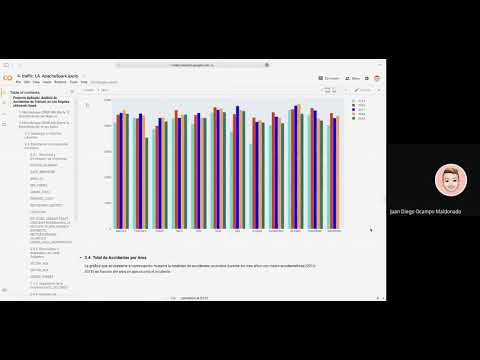

In [110]:
# Play YouTube Video
YouTubeVideo(id='_Ut9Vhf2oII',width=1280,height=720)